In [2]:
import tensorflow as tf
import os
import sys
import collections

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
a = os.path.join(module_path, "strands_qsr_lib\qsr_lib\src3")

sys.path.append(a)
from rl import action_learner, action_learner_search, value_estimator
import progress_learner
import config
import project
# Need to add this import to load class
from project import Project
from importlib import reload
from rl import block_movement_env
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline
import plotting

In [3]:
p = project.Project.load(os.path.join('..' , 'learned_models', 'slidearound' + "_project.proj"))

In [15]:
reload(config)
c = config.Config()
c.no_of_loops = 1
# c.constraint_sigma = 0
reload(block_movement_env)
reload(value_estimator)
reload(action_learner_search)
reload(progress_learner)
tf.reset_default_graph()

global_step = tf.Variable(0, name="global_step", trainable=False)

sess =  tf.Session()

with tf.variable_scope("search") as scope:
    policy_estimator = value_estimator.PolicyEstimator(c)

sess.run(tf.global_variables_initializer())

with tf.variable_scope("model") as scope:
    print('-------- Load progress model ---------')
    progress_estimator = progress_learner.EventProgressEstimator(is_training=False, name = p.name, config = c, is_dropout = False)  

# Print out all variables that would be restored
for variable in tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'):
    print (variable.name)

saver = tf.train.Saver(tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES, scope='model'))
saver.restore(sess, os.path.join('..' , 'learned_models', 'progress_' + 'SlideAround' + '.mod.1'))

-------- Load progress model ---------
self.inputs.shape = (?, 20, 200)  after linear layer
output.shape = (30, 200) after LSTM
self.output.shape = (30,) after linear
self._targets.shape = (?,) 
model/SlideAround/linear/weight:0
model/SlideAround/linear/bias:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/kernel:0
model/SlideAround/lstm/rnn/multi_rnn_cell/cell_0/basic_lstm_cell/bias:0
model/SlideAround/output_linear/weight:0
model/SlideAround/output_linear/bias:0
INFO:tensorflow:Restoring parameters from ..\learned_models\progress_SlideAround.mod.1


In [40]:
c.progress_threshold=0.90
#reload(action_learner_search)
action_ln = action_learner_search.ActionLearner_Search(c, p, progress_estimator, session = sess)
explorations = action_ln.learn_one_setup(verbose = True)

action_level = 0
exploration_index = 0
=== Best explorations ===
[(0, 0.8192676305770874), (0, 0.7764692902565002), (0, 0.7719799280166626), (0, 0.7718008756637573), (0, 0.7497783303260803), (0, 0.7130630612373352), (0, 0.7100185751914978), (0, 0.7062987089157104), (0, 0.6852624416351318)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
=== Best explorations ===
[(2, 0.8230776190757751), (0, 0.8192676305770874), (0, 0.8192676305770874), (0, 0.8192676305770874), (0, 0.8192676305770874), (0, 0.8192676305770874), (0, 0.8192676305770874), (0, 0.8192676305770874), (0, 0.8192676305770874)]
action_level = 2
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
=== Best explorations ===
[

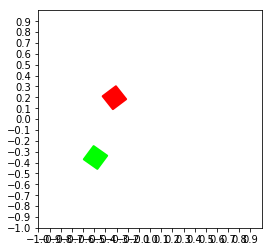

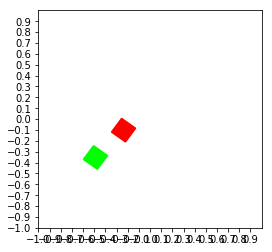

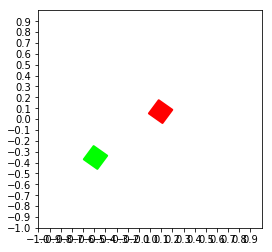

In [46]:
explorations[0].replay(verbose = False)

In [77]:
explorations[0].action_storage

[[0,
  [ 0.09620159  0.53687454  0.54786098] - 0.075,
  [ 0.2468325   0.24736097  0.18016125] - 0.075,
  array([ 0.23930095,  0.26183665,  0.19854624,  0.2468325 ,  0.24736097,
          0.18016125, -0.02529948,  0.32366525,  0.65520882, -0.02529948,
          0.32366525,  0.65520882]),
  0.54755002,
  True,
  array([ 0.,  0.,  0.], dtype=float32),
  array([ 2. ,  2. ,  0.5], dtype=float32)],
 [0,
  [ 0.2468325   0.24736097  0.18016125] - 0.075,
  [-0.16479168  0.00778572  0.72506144] - 0.075,
  array([-0.1301075 ,  0.02797275,  0.67914719, -0.16479168,  0.00778572,
          0.72506144, -0.02529948,  0.32366525,  0.65520882, -0.02529948,
          0.32366525,  0.65520882]),
  0.77140433,
  True,
  array([ 0.,  0.,  0.], dtype=float32),
  array([ 2. ,  2. ,  0.5], dtype=float32)],
 [0,
  [-0.16479168  0.00778572  0.72506144] - 0.075,
  [-0.36508342  0.63935325  0.1298281 ] - 0.075,
  array([-0.34293732,  0.56952132,  0.1956426 , -0.36508342,  0.63935325,
          0.1298281 , -0.025299

In [78]:
explorations[0].start_config

[Cube : [ 0.09620159  0.53687454  0.54786098],
 Cube : [-0.02529948  0.32366525  0.65520882]]

In [64]:
from rl import discrete_action_learner_search
reload(action_learner_search)
reload(discrete_action_learner_search)
action_ln_2 = discrete_action_learner_search.Discrete_ActionLearner_Search(c, p, progress_estimator, session = sess)
explorations = action_ln_2.learn_one_setup(verbose = True)

action_level = 0
exploration_index = 0
=== Best explorations ===
[(0, 0.5127173066139221), (0, 0.5021935105323792), (0, 0.3837542235851288), (0, 0.2894745469093323), (0, 0.19812117516994476), (0, 0.11089949309825897), (0, 0.11089949309825897), (0, 0.07962137460708618), (0, 0.058997925370931625)]
action_level = 1
exploration_index = 0
exploration_index = 1
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploration_index = 7
exploration_index = 8
=== Best explorations ===
[(2, 0.7248337268829346), (2, 0.7248337268829346), (3, 0.6945853233337402), (2, 0.668342649936676), (3, 0.6333587169647217), (3, 0.6333587169647217), (0, 0.6312257647514343), (3, 0.6177037358283997), (3, 0.6177037358283997)]
action_level = 2
exploration_index = 0
=== found_completed_act ===
exploration_index = 1
=== found_completed_act ===
exploration_index = 2
exploration_index = 3
exploration_index = 4
exploration_index = 5
exploration_index = 6
exploratio

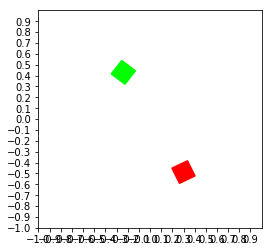

(None, None)
[-0.74387091  0.36294309  0.91717576]
[[ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [-1.   0.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [-1.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]]
Progress = 0.38; reward = 0.38


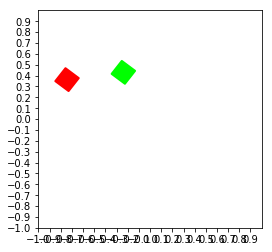

(None, None)
[-0.30606432  0.93454207  0.91717576]
[[ 0.   0.   0.   0.   0.   0.  -0.5]
 [ 0.  -2.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [-1.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.   0.   0.  -0.5]
 [ 0.  -2.  -1.   0.  -1.   0.  -0.5]
 [ 0.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [-1.   0.  -1.   0.  -1.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]]
Progress = 0.72; reward = 0.34


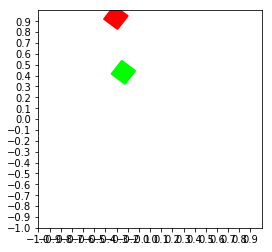

(None, None)
[0.77023744 0.56363167 0.91717576]
[[ 0.  -2.  -1.   0.   0.   0.  -0.5]
 [-1.  -2.  -1.   0.   0.   0.  -0.5]
 [ 0.  -2.  -1.   0.   0.   0.  -0.5]
 [ 0.  -2.  -1.   0.   0.   0.  -0.5]
 [ 0.  -1.  -1.   0.  -1.   0.  -0.5]
 [-1.  -1.  -1.   0.  -1.   0.  -0.5]
 [ 0.   1.  -1.   0.  -1.   0.   0. ]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.  -1.  -1.   0.  -1.   0.   0. ]
 [-1.  -1.  -1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   0.   1.   0.  -1.   0.   0. ]
 [ 0.   0.  -1.   0.  -1.   0.   0. ]
 [-1.   0.  -1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   1.   1.   0.  -1.   0.   0. ]
 [-1.   1.   1.   0.  -1.   0.   0. ]
 [ 0.   2.   1.   0.  -1.   0.   0. ]]
Progress = 0.91; reward = 0.18


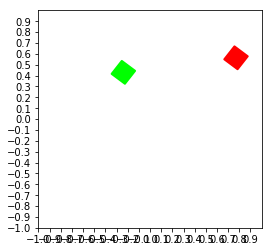

In [65]:
explorations[0].replay(verbose = True)